# Generate rays and save them in a CSV file for Iridium mirrors.
### August 24, 2017

In [1]:
from foxsisim.module import Module
from foxsisim.detector import Detector
from foxsisim.source import Source
from foxsisim.plotting import plot,scatterHist
import matplotlib.pyplot as plt
import numpy as np

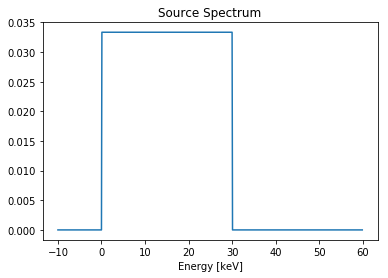

In [2]:
max_energy = 30.0
nrays = 1000

def spectrum(z):
        if (type(z) is not type([1])) and (type(z) is not type(np.array(1))):
            x = np.array([z])
        else:
            x = np.array(z)
        return np.piecewise(x, [x < 0, ((x < max_energy) & (x > 0)), (x >= max_energy)], [0, 1./max_energy, 0])

source_distance = -1e4 ##cm
source = Source(type='point', center=[0, 0, source_distance])
source.loadSpectrum(spectrum)
energies = np.arange(-10, 60, 0.1)
plt.plot(energies, source._spectrum(energies))
plt.xlabel('Energy [keV]')
plt.title('Source Spectrum')
plt.show()

In [3]:
module = Module(radii=[5.151,4.9],focal=200.0)
detector = Detector(width=8,
                    height=8,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

rays = source.generateRays(module.targetFront, nrays) # this should run for about 7 hours


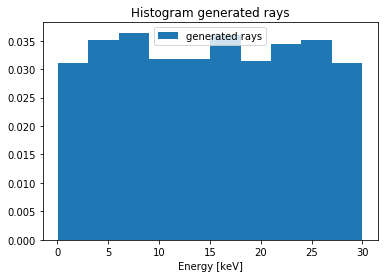

In [4]:
plt.figure()
plt.hist([ray.energy for ray in rays], normed=True, label='generated rays')
plt.xlabel('Energy [keV]')
plt.title('Histogram generated rays')
plt.legend()
plt.show()

In [5]:
from datetime import datetime
tstart = datetime.now()

In [6]:
module.passRays(rays, robust=True)

Number of rays on Detector 80
Time total: 2 seconds
Time per ray (s): 40.0


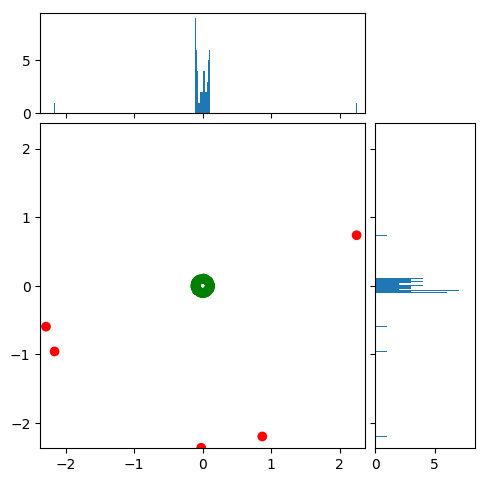

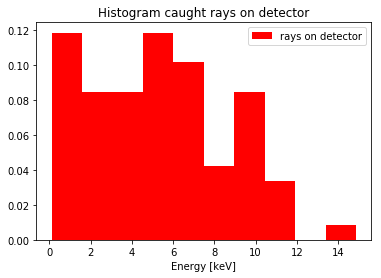

In [7]:
detector.catchRays(rays)


rays_on_detector = len(detector.rays)
print('Number of rays on Detector ' + str(rays_on_detector))
print('Time total: ' + str((datetime.now() - tstart).seconds) + ' seconds')
print('Time per ray (s): ' + str(rays_on_detector / float((datetime.now() - tstart).seconds)))

drays = [ray for ray in rays if ray.des[2]==230.0]
scatterHist(drays)
plt.show()
#plt.savefig('photons_on_detec.png')

plt.figure()
plt.hist([ray.energy for ray in detector.rays], normed=True, label='rays on detector',color='r')
plt.xlabel('Energy [keV]')
plt.title('Histogram caught rays on detector')
plt.legend()
plt.show()
#plt.savefig('output_spect_on_detec.png')


In [8]:
from foxsisim.util import save_rays, load_rays 
save_rays(detector.rays,filename='/Users/Kamilobu/Desktop/rays/run03.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Kamilobu/Desktop/rays/run03.csv'

# Iridium reflectivity

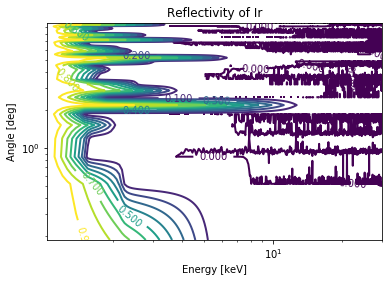

In [3]:
import foxsisim.reflectivity as ref
import matplotlib.pyplot as plt
from foxsisim.plotting import plot

r = ref.Reflectivity()
plot(r)

plt.show()


In [7]:
rNi = ref.Reflectivity(material='Ir')
#plot(rNi)
#plt.show()